In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the csv files
matches = pd.read_csv(r"IPL Matches 2008-2020.csv")
deliveries = pd.read_csv(r"IPL Ball-by-Ball 2008-2020.csv")

In [3]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,9/28/2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,11/5/2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,11/6/2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,11/8/2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
deliveries

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


# exploratoy data analysis

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [6]:
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
deliveries.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193468.0,756768.808439,306097.091418,335982.0,501227.0,729297.0,1082628.0,1237181.0
inning,193468.0,1.482131,0.499682,1.0,1.0,1.0,2.0,2.0
over,193468.0,9.177027,5.676848,0.0,4.0,9.0,14.0,19.0
ball,193468.0,3.615967,1.807128,1.0,2.0,4.0,5.0,9.0
batsman_runs,193468.0,1.240231,1.610867,0.0,0.0,1.0,1.0,6.0
extra_runs,193468.0,0.066414,0.339991,0.0,0.0,0.0,0.0,7.0
total_runs,193468.0,1.306645,1.598802,0.0,0.0,1.0,1.0,7.0
non_boundary,193468.0,0.000083,0.009094,0.0,0.0,0.0,0.0,1.0
is_wicket,193468.0,0.049078,0.216031,0.0,0.0,0.0,0.0,1.0


In [9]:
#cheking for null values
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [11]:
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('None')
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('None')
deliveries['fielder'] = deliveries['fielder'].fillna('None')
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')
deliveries['bowling_team'] = deliveries['bowling_team'].fillna('None')

In [12]:
categorical_columns = ['city','player_of_match','winner','result','eliminator']

for col in categorical_columns:
    matches[col].fillna(matches[col].mode()[0], inplace=True)

In [13]:
matches['result_margin'].fillna(matches['result_margin'].median(), inplace=True)
matches['method'] = matches['method'].fillna('Normal')

In [14]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [15]:
deliveries.isnull().sum()

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

In [16]:
# changing the datetime format
matches['date']=pd.to_datetime(matches['date'],infer_datetime_format=True)
matches['season']=matches['date'].dt.year

matches['date'].max()

Timestamp('2020-11-10 00:00:00')

In [17]:
matches['date'].min()

Timestamp('2008-04-18 00:00:00')

In [18]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Normal,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Normal,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Normal,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Normal,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,8.0,Y,Normal,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,Normal,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,Normal,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,Normal,PR Reiffel,S Ravi,2020


# data visualization

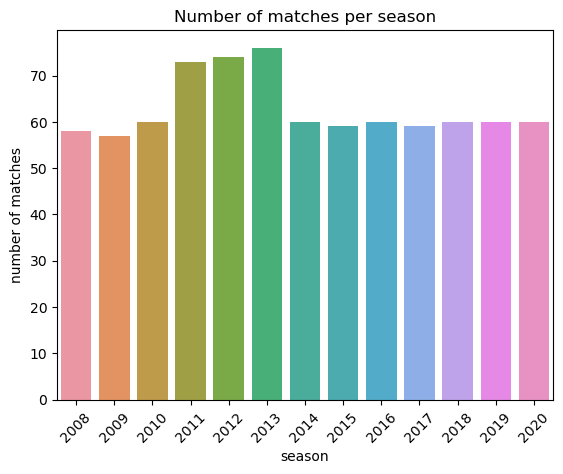

In [19]:
matches_per_season = matches['season'].value_counts()

sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.xlabel('season')
plt.ylabel('number of matches')
plt.title('Number of matches per season')
plt.xticks(rotation=45)
plt.show()

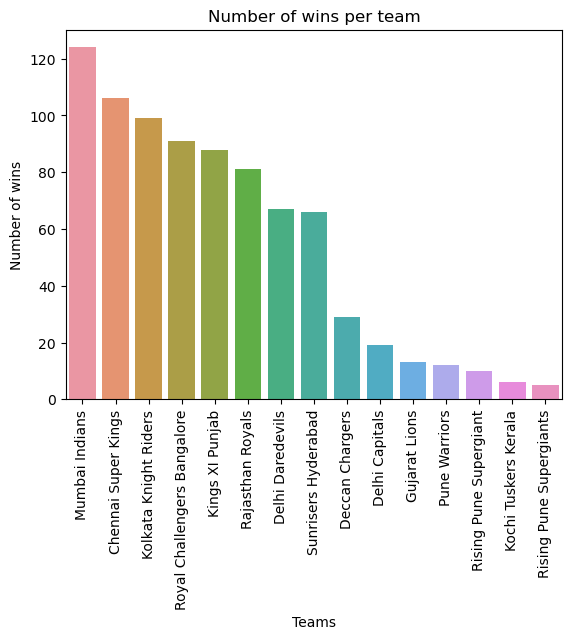

In [20]:
#number of wins per team
wins_per_team = matches['winner'].value_counts()

sns.barplot(x=wins_per_team.index, y=wins_per_team.values)
plt.title('Number of wins per team')
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.xticks(rotation=90)
plt.show()

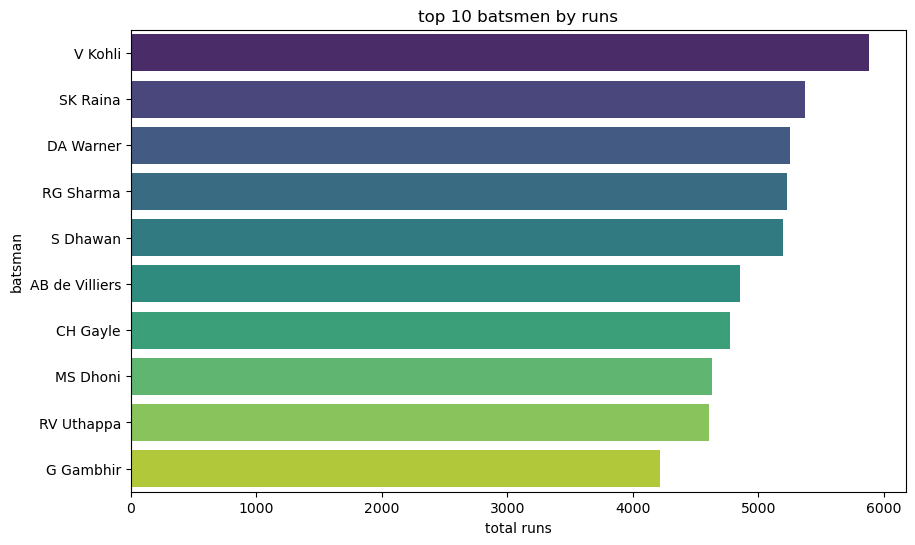

In [21]:
# Total runs scored by each batsman
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

#plotting
plt.figure(figsize=(10,6))
sns.barplot(x=batsman_runs.values, y= batsman_runs.index, palette='viridis')
plt.title('top 10 batsmen by runs')
plt.xlabel('total runs')
plt.ylabel('batsman')
plt.show()

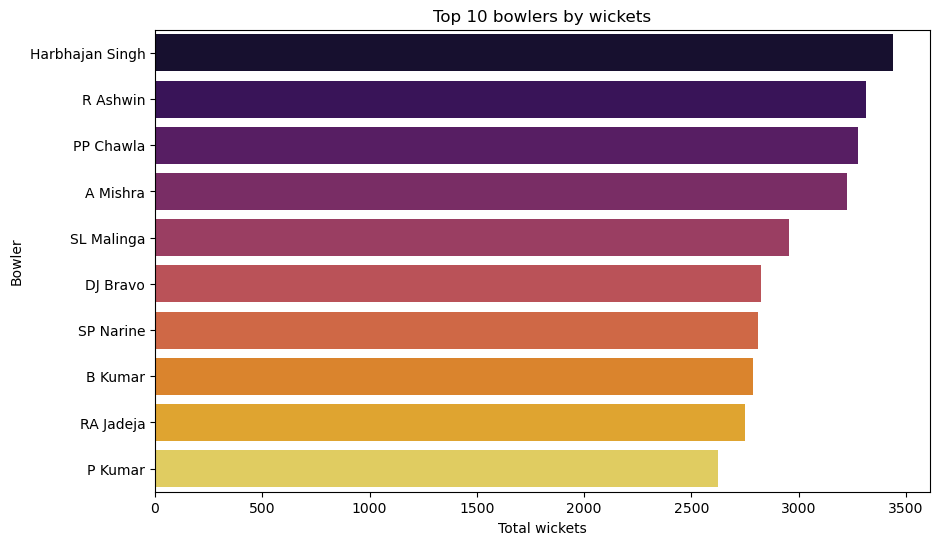

In [22]:
#most wickets by a bowler

wickets = deliveries[deliveries['dismissal_kind'].notnull()&(deliveries['dismissal_kind'] != 'run out')]
bowler_wickets = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

#plotting
plt.figure(figsize=(10,6))
sns.barplot(x=bowler_wickets.values, y=bowler_wickets.index, palette='inferno')
plt.title('Top 10 bowlers by wickets')
plt.xlabel('Total wickets')
plt.ylabel('Bowler')
plt.show()

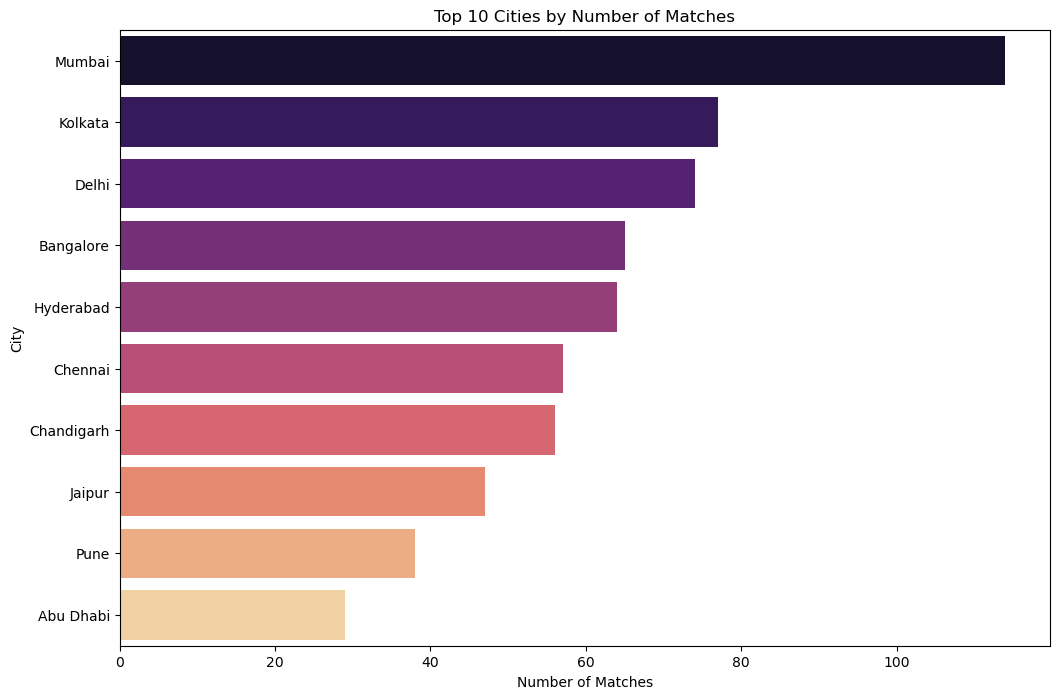

In [23]:
# Matches played in each city
matches_per_city = matches['city'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(x=matches_per_city.values, y=matches_per_city.index, palette='magma')
plt.title('Top 10 Cities by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()

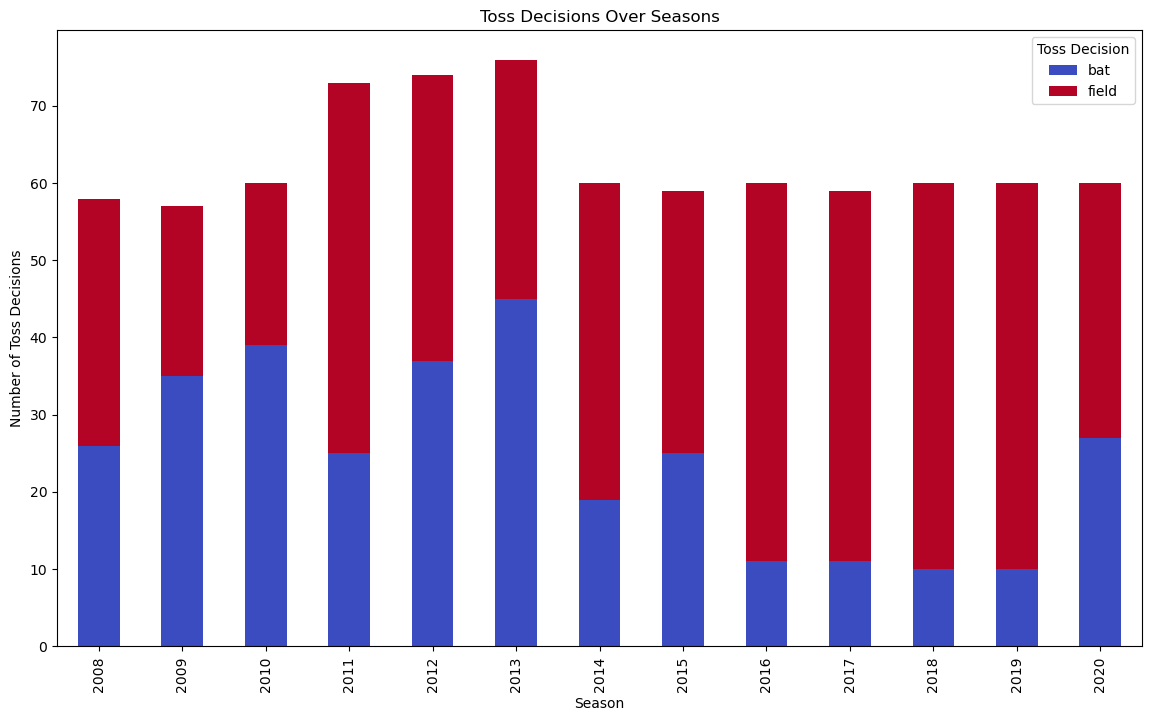

In [24]:
# Toss decisions over seasons
toss_decisions = matches.groupby('season')['toss_decision'].value_counts().unstack().fillna(0)

# Plotting
toss_decisions.plot(kind='bar', stacked=True, figsize=(14,8), colormap='coolwarm')
plt.title('Toss Decisions Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.legend(title='Toss Decision')
plt.show()

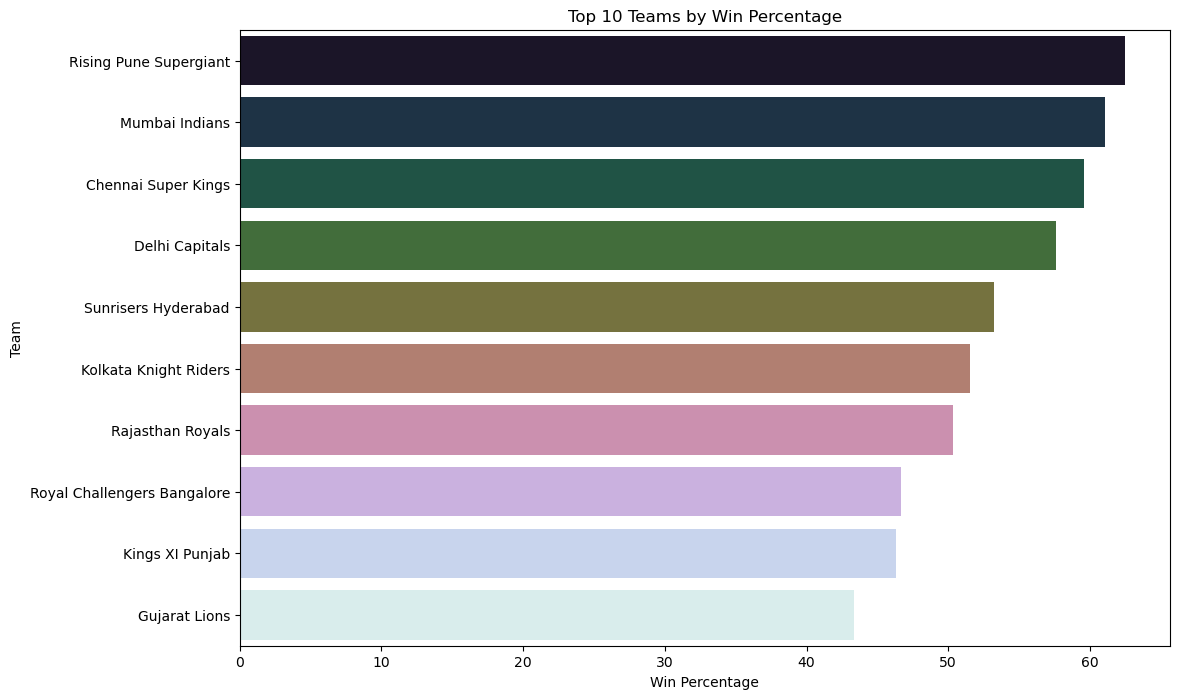

In [25]:
# Total matches and wins for each team
total_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
wins = matches['winner'].value_counts()
win_percentage = (wins / total_matches * 100).sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(x=win_percentage.values, y=win_percentage.index, palette='cubehelix')
plt.title('Top 10 Teams by Win Percentage')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.show()

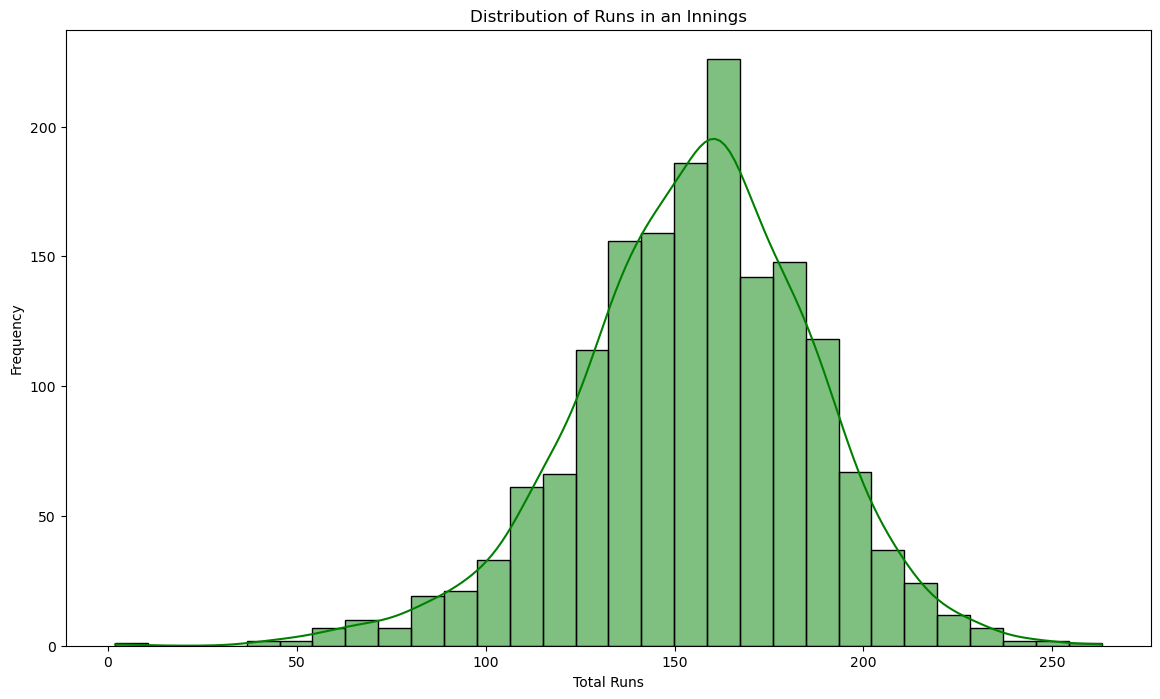

In [26]:
# Distribution of total runs in an innings
total_runs_per_inning = deliveries.groupby(['id', 'inning'])['total_runs'].sum().reset_index()

# Plotting
plt.figure(figsize=(14,8))
sns.histplot(total_runs_per_inning['total_runs'], bins=30, kde=True, color='g')
plt.title('Distribution of Runs in an Innings')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

## merging the datsets by way of ID

In [27]:
ipl = pd.merge(deliveries, matches, how = 'inner', on = 'id')
ipl

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,Normal,CB Gaffaney,Nitin Menon,2020
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,Normal,CB Gaffaney,Nitin Menon,2020
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,Normal,CB Gaffaney,Nitin Menon,2020
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,Normal,CB Gaffaney,Nitin Menon,2020


In [28]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                193468 non-null  int64         
 1   inning            193468 non-null  int64         
 2   over              193468 non-null  int64         
 3   ball              193468 non-null  int64         
 4   batsman           193468 non-null  object        
 5   non_striker       193468 non-null  object        
 6   bowler            193468 non-null  object        
 7   batsman_runs      193468 non-null  int64         
 8   extra_runs        193468 non-null  int64         
 9   total_runs        193468 non-null  int64         
 10  non_boundary      193468 non-null  int64         
 11  is_wicket         193468 non-null  int64         
 12  dismissal_kind    193468 non-null  object        
 13  player_dismissed  193468 non-null  object        
 14  fiel

# Standardization

In [29]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ipl['batsman'] = le.fit_transform(ipl['batsman'])
ipl['non_striker'] = le.fit_transform(ipl['non_striker'])
ipl['bowler'] = le.fit_transform(ipl['bowler'])
ipl['toss_winner'] = le.fit_transform(ipl['toss_winner'])
ipl['toss_decision'] = le.fit_transform(ipl['toss_decision'])
ipl['batsman'] = le.fit_transform(ipl['batsman'])
ipl['winner'] = le.fit_transform(ipl['winner'])
ipl['result'] = le.fit_transform(ipl['result'])
ipl['eliminator'] = le.fit_transform(ipl['eliminator'])
ipl['method'] = le.fit_transform(ipl['method'])
ipl['umpire1'] = le.fit_transform(ipl['umpire1'])
ipl['umpire2'] = le.fit_transform(ipl['umpire2'])
ipl['dismissal_kind'] = le.fit_transform(ipl['dismissal_kind'])
ipl['player_dismissed'] = le.fit_transform(ipl['player_dismissed'])
ipl['fielder'] = le.fit_transform(ipl['fielder'])
ipl['extras_type'] = le.fit_transform(ipl['extras_type'])
ipl['batting_team'] = le.fit_transform(ipl['batting_team'])
ipl['bowling_team'] = le.fit_transform(ipl['bowling_team'])
ipl['city'] = le.fit_transform(ipl['city'])
ipl['player_of_match'] = le.fit_transform(ipl['player_of_match'])
ipl['venue'] = le.fit_transform(ipl['venue'])
ipl['team1'] = le.fit_transform(ipl['team1'])
ipl['team2'] = le.fit_transform(ipl['team2'])

In [30]:
ipl

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,1,6,5,396,77,18,1,0,1,...,13,1,7,0,140.0,0,1,7,29,2008
1,335982,1,6,6,77,393,18,1,0,1,...,13,1,7,0,140.0,0,1,7,29,2008
2,335982,1,7,1,77,393,419,0,0,0,...,13,1,7,0,140.0,0,1,7,29,2008
3,335982,1,7,2,77,393,419,1,0,1,...,13,1,7,0,140.0,0,1,7,29,2008
4,335982,1,7,3,396,77,419,1,0,1,...,13,1,7,0,140.0,0,1,7,29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,388,454,259,0,0,0,...,2,0,8,2,5.0,0,1,13,25,2020
193464,1237181,1,12,6,388,454,259,1,0,1,...,2,0,8,2,5.0,0,1,13,25,2020
193465,1237181,1,13,1,388,454,182,0,1,1,...,2,0,8,2,5.0,0,1,13,25,2020
193466,1237181,1,13,2,388,454,182,1,0,1,...,2,0,8,2,5.0,0,1,13,25,2020


In [31]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                193468 non-null  int64         
 1   inning            193468 non-null  int64         
 2   over              193468 non-null  int64         
 3   ball              193468 non-null  int64         
 4   batsman           193468 non-null  int64         
 5   non_striker       193468 non-null  int32         
 6   bowler            193468 non-null  int32         
 7   batsman_runs      193468 non-null  int64         
 8   extra_runs        193468 non-null  int64         
 9   total_runs        193468 non-null  int64         
 10  non_boundary      193468 non-null  int64         
 11  is_wicket         193468 non-null  int64         
 12  dismissal_kind    193468 non-null  int32         
 13  player_dismissed  193468 non-null  int32         
 14  fiel

In [32]:
# scaling
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
# Reshape the data to a 2D array
result_margin_reshaped = ipl['result_margin'].values.reshape(-1, 1)
# Apply the scaler
ipl['result_margin'] = ss.fit_transform(result_margin_reshaped)

In [33]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                193468 non-null  int64         
 1   inning            193468 non-null  int64         
 2   over              193468 non-null  int64         
 3   ball              193468 non-null  int64         
 4   batsman           193468 non-null  int64         
 5   non_striker       193468 non-null  int32         
 6   bowler            193468 non-null  int32         
 7   batsman_runs      193468 non-null  int64         
 8   extra_runs        193468 non-null  int64         
 9   total_runs        193468 non-null  int64         
 10  non_boundary      193468 non-null  int64         
 11  is_wicket         193468 non-null  int64         
 12  dismissal_kind    193468 non-null  int32         
 13  player_dismissed  193468 non-null  int32         
 14  fiel

In [34]:
# dropping the the id and the date columns since they are irrelevant at this point
ipl=ipl.drop(['id','date'], axis=1)
ipl

,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,...,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,1,6,5,396,77,18,1,0,1,0,...,13,1,7,0,0.958621,0,1,7,29,2008
1,1,6,6,77,393,18,1,0,1,0,...,13,1,7,0,0.958621,0,1,7,29,2008
2,1,7,1,77,393,419,0,0,0,0,...,13,1,7,0,0.958621,0,1,7,29,2008
3,1,7,2,77,393,419,1,0,1,0,...,13,1,7,0,0.958621,0,1,7,29,2008
4,1,7,3,396,77,419,1,0,1,0,...,13,1,7,0,0.958621,0,1,7,29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1,12,5,388,454,259,0,0,0,0,...,2,0,8,2,0.027586,0,1,13,25,2020
193464,1,12,6,388,454,259,1,0,1,0,...,2,0,8,2,0.027586,0,1,13,25,2020
193465,1,13,1,388,454,182,0,1,1,0,...,2,0,8,2,0.027586,0,1,13,25,2020
193466,1,13,2,388,454,182,1,0,1,0,...,2,0,8,2,0.027586,0,1,13,25,2020


In [35]:
# splitting the data
# selected the crucial columns that are going to help in te creation of the machine learning model, since we cannot use all of the columns available.
# using all the columns can lead to overfitting thus causing a relativeley lower accuracy score
features = ['team1','team2','venue','toss_winner','toss_decision']
X = ipl[features]
X

,team1,team2,venue,toss_winner,toss_decision
0,13,7,14,13,1
1,13,7,14,13,1
2,13,7,14,13,1
3,13,7,14,13,1
4,13,7,14,13,1
...,...,...,...,...,...
193463,2,8,6,2,0
193464,2,8,6,2,0
193465,2,8,6,2,0
193466,2,8,6,2,0


In [36]:
# winner is the target variable in this case.
y= ipl['winner']
y

0         7
1         7
2         7
3         7
4         7
         ..
193463    8
193464    8
193465    8
193466    8
193467    8
Name: winner, Length: 193468, dtype: int32

# Building the model (RandomForestClassifier)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 88.427146327596
Confusion Matrix:
 [[4838    0    0    0    0    0    0    0  108   42    0    0    0  139
     0]
 [   0 1403    0    0    0    0    0    0    0    0    0    0    0   56
     0]
 [   0    0  945    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 158   51    0 2121   45  146    0   75  132   40  152    0    0  150
     0]
 [   0    0    0    0  554    0    0    0    0    0    0    0    0   48
     0]
 [   0    0    0   57    0 3772    0  142  149   37    0    0    0   32
    50]
 [   0    0    0    0    0    0  254    0    0    0    0    0    0    0
     0]
 [ 101    0    0   48    0   33    0 4114  169    0   49    0    0  204
     0]
 [ 131    0    0   67    0  111    0    0 5194    0   69    0    0  103
    97]
 [   0    0    0    0    0    0    0    0    0  571    0    0    0    0
     0]
 [ 100    0    0    0    0   82    0  102  242    0 3345    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0  496    0    0
   

In [40]:
# prediction of win probability for a new match

example_match = {
    'team1': 'Mumbai Indians',
    'team2': 'Chennai Super Kings',
    'venue': 'Wankhede Stadium',
    'toss_winner': 'Mumbai Indians',
    'toss_decision': 'bat'
}
example_df = pd.DataFrame([example_match])
example_df = pd.get_dummies(example_df)
example_df = example_df.reindex(columns=X.columns, fill_value=0)

# Predict win probability
win_prob = model.predict_proba(example_df)
print(f"Win probability: {win_prob}")

Win probability: [[0.73157297 0.04       0.07       0.         0.         0.15
  0.         0.00842703 0.         0.         0.         0.
  0.         0.         0.        ]]
